Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
# on udacity workspace:
!pip -q install ../../python

# local:
#!pip install -r requirements.txt

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.22 which is incompatible.


In [1]:
# %load_ext autoreload
# %autoreload 2

In [1]:
import pandas as pd
import os
import datetime
import torch
from collections import namedtuple, deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from workspace_utils import keep_awake, active_session

# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

## 1. Start the Environment


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [5]:
from unityagents import UnityEnvironment
import numpy as np

# seed makes env deterministic
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")#, seed=42)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Explore the environment

### 2.1 Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 2.2 Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [9]:
scores_deque = deque(maxlen=100)
all_scores_deque = []
all_scores = []
for i in range(5):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    scores_deque.append(max(scores))
    all_scores_deque.append(np.mean(scores_deque))
    all_scores.append(max(scores))
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
    

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 2.3 Examine the average number of steps in an episode for an untrained agent

- Most of the steps in an episode the agent receives zero reward
- The agent needs to see suffient non-zero-reward-steps in order to start learning

In [10]:
tmax = []
for i in range(100):                                      # play game for 5 episodes
    print(i, end='\r')
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    #print('===================')
    t=0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        states = env_info.vector_observations         # get next state (for each agent)
        dones = env_info.local_done                        # see if episode finished
        if np.any(dones):                                  # exit loop if episode finished
            tmax.append(t)
            break
        t+=1
print('Average number of steps per episode:', np.mean(tmax))

Average number of steps per episode: 17.06


### 2.4 Measure the mean score for an untrained agent

- this is the baseline score we need to beat!

In [11]:
scores_deque = deque(maxlen=100)
all_scores_deque = []
all_scores = []
for i in range(1000):                                      # play game for 5 episodes
    print(i, end='\r')
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    scores_deque.append(max(scores))
    all_scores_deque.append(np.mean(scores_deque))
    all_scores.append(max(scores))
    

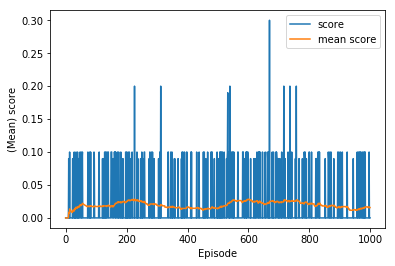

In [12]:
# random actions

plt.plot(range(1000), all_scores, label='score')
plt.plot(range(1000), all_scores_deque, label='mean score')
plt.xlabel('Episode')
plt.ylabel('(Mean) score')
plt.legend()


## 3. Train the agent using MADDPG


In [10]:
from utils import seeding, save_scores, plot_scores
from agents import MADDPG

In [11]:
random_seed = 42
n_episodes = 6000
t_max = 1000
add_noise=True
n_random_episodes = 300
n_extra_episodes = 600
noise_decay = 0.999
version = 'v18'

q_input_size = int(2 * (state_size + action_size))

seeding(random_seed)

maddpg = MADDPG(state_size, action_size, q_input_size, random_seed)

06:11:40 	 - 	 Episode: 0 	 - 	 Score: 0.000 	 - 	 Mean score: 0.000
06:11:40 	 - 	 Episode: 1 	 - 	 Score: 0.000 	 - 	 Mean score: 0.000
06:11:40 	 - 	 Episode: 2 	 - 	 Score: 0.100 	 - 	 Mean score: 0.033
06:11:40 	 - 	 Episode: 3 	 - 	 Score: 0.000 	 - 	 Mean score: 0.025
06:11:40 	 - 	 Episode: 4 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
06:11:40 	 - 	 Episode: 5 	 - 	 Score: 0.000 	 - 	 Mean score: 0.017
06:11:41 	 - 	 Episode: 6 	 - 	 Score: 0.000 	 - 	 Mean score: 0.014
06:11:41 	 - 	 Episode: 7 	 - 	 Score: 0.000 	 - 	 Mean score: 0.013
06:11:41 	 - 	 Episode: 8 	 - 	 Score: 0.000 	 - 	 Mean score: 0.011
06:11:41 	 - 	 Episode: 9 	 - 	 Score: 0.000 	 - 	 Mean score: 0.010
06:11:41 	 - 	 Episode: 10 	 - 	 Score: 0.000 	 - 	 Mean score: 0.009
06:11:41 	 - 	 Episode: 11 	 - 	 Score: 0.000 	 - 	 Mean score: 0.008
06:11:41 	 - 	 Episode: 12 	 - 	 Score: 0.100 	 - 	 Mean score: 0.015
06:11:41 	 - 	 Episode: 13 	 - 	 Score: 0.000 	 - 	 Mean score: 0.014
06:11:42 	 - 	 Episode: 14 	 -

06:14:24 	 - 	 Episode: 117 	 - 	 Score: 0.000 	 - 	 Mean score: 0.023
06:14:25 	 - 	 Episode: 118 	 - 	 Score: 0.000 	 - 	 Mean score: 0.022
06:14:26 	 - 	 Episode: 119 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:14:27 	 - 	 Episode: 120 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
06:14:30 	 - 	 Episode: 121 	 - 	 Score: 0.090 	 - 	 Mean score: 0.021
06:14:31 	 - 	 Episode: 122 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:14:32 	 - 	 Episode: 123 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:14:33 	 - 	 Episode: 124 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:14:34 	 - 	 Episode: 125 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:14:38 	 - 	 Episode: 126 	 - 	 Score: 0.100 	 - 	 Mean score: 0.021
06:14:39 	 - 	 Episode: 127 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:14:40 	 - 	 Episode: 128 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
06:14:41 	 - 	 Episode: 129 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
06:14:42 	 - 	 Episode: 130 	 - 	 Score: 0.000 	 - 	 Mean score: 0.019
06:14:

06:17:19 	 - 	 Episode: 233 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
06:17:21 	 - 	 Episode: 234 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
06:17:25 	 - 	 Episode: 235 	 - 	 Score: 0.100 	 - 	 Mean score: 0.021
06:17:26 	 - 	 Episode: 236 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:17:27 	 - 	 Episode: 237 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:17:28 	 - 	 Episode: 238 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:17:29 	 - 	 Episode: 239 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:17:30 	 - 	 Episode: 240 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:17:31 	 - 	 Episode: 241 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:17:32 	 - 	 Episode: 242 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:17:34 	 - 	 Episode: 243 	 - 	 Score: 0.000 	 - 	 Mean score: 0.021
06:17:35 	 - 	 Episode: 244 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
06:17:36 	 - 	 Episode: 245 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
06:17:37 	 - 	 Episode: 246 	 - 	 Score: 0.000 	 - 	 Mean score: 0.020
06:17:

06:20:52 	 - 	 Episode: 349 	 - 	 Score: 0.100 	 - 	 Mean score: 0.049
06:20:53 	 - 	 Episode: 350 	 - 	 Score: 0.000 	 - 	 Mean score: 0.049
06:20:55 	 - 	 Episode: 351 	 - 	 Score: 0.090 	 - 	 Mean score: 0.049
06:20:58 	 - 	 Episode: 352 	 - 	 Score: 0.100 	 - 	 Mean score: 0.050
06:21:01 	 - 	 Episode: 353 	 - 	 Score: 0.100 	 - 	 Mean score: 0.051
06:21:04 	 - 	 Episode: 354 	 - 	 Score: 0.100 	 - 	 Mean score: 0.052
06:21:06 	 - 	 Episode: 355 	 - 	 Score: 0.100 	 - 	 Mean score: 0.052
06:21:09 	 - 	 Episode: 356 	 - 	 Score: 0.100 	 - 	 Mean score: 0.053
06:21:10 	 - 	 Episode: 357 	 - 	 Score: 0.000 	 - 	 Mean score: 0.053
06:21:13 	 - 	 Episode: 358 	 - 	 Score: 0.090 	 - 	 Mean score: 0.053
06:21:15 	 - 	 Episode: 359 	 - 	 Score: 0.100 	 - 	 Mean score: 0.054
06:21:18 	 - 	 Episode: 360 	 - 	 Score: 0.090 	 - 	 Mean score: 0.053
06:21:21 	 - 	 Episode: 361 	 - 	 Score: 0.100 	 - 	 Mean score: 0.054
06:21:23 	 - 	 Episode: 362 	 - 	 Score: 0.090 	 - 	 Mean score: 0.055
06:21:

06:26:33 	 - 	 Episode: 465 	 - 	 Score: 0.090 	 - 	 Mean score: 0.090
06:26:36 	 - 	 Episode: 466 	 - 	 Score: 0.100 	 - 	 Mean score: 0.090
06:26:38 	 - 	 Episode: 467 	 - 	 Score: 0.090 	 - 	 Mean score: 0.090
06:26:41 	 - 	 Episode: 468 	 - 	 Score: 0.090 	 - 	 Mean score: 0.091
06:26:46 	 - 	 Episode: 469 	 - 	 Score: 0.100 	 - 	 Mean score: 0.091
06:26:48 	 - 	 Episode: 470 	 - 	 Score: 0.100 	 - 	 Mean score: 0.091
06:26:54 	 - 	 Episode: 471 	 - 	 Score: 0.100 	 - 	 Mean score: 0.092
06:26:57 	 - 	 Episode: 472 	 - 	 Score: 0.100 	 - 	 Mean score: 0.092
06:27:00 	 - 	 Episode: 473 	 - 	 Score: 0.090 	 - 	 Mean score: 0.092
06:27:02 	 - 	 Episode: 474 	 - 	 Score: 0.090 	 - 	 Mean score: 0.092
06:27:05 	 - 	 Episode: 475 	 - 	 Score: 0.090 	 - 	 Mean score: 0.092
06:27:08 	 - 	 Episode: 476 	 - 	 Score: 0.090 	 - 	 Mean score: 0.092
06:27:11 	 - 	 Episode: 477 	 - 	 Score: 0.100 	 - 	 Mean score: 0.092
06:27:24 	 - 	 Episode: 478 	 - 	 Score: 0.400 	 - 	 Mean score: 0.095
06:27:

06:33:45 	 - 	 Episode: 581 	 - 	 Score: 0.300 	 - 	 Mean score: 0.111
06:33:48 	 - 	 Episode: 582 	 - 	 Score: 0.090 	 - 	 Mean score: 0.111
06:33:52 	 - 	 Episode: 583 	 - 	 Score: 0.100 	 - 	 Mean score: 0.111
06:33:55 	 - 	 Episode: 584 	 - 	 Score: 0.100 	 - 	 Mean score: 0.111
06:33:59 	 - 	 Episode: 585 	 - 	 Score: 0.100 	 - 	 Mean score: 0.111
06:34:01 	 - 	 Episode: 586 	 - 	 Score: 0.090 	 - 	 Mean score: 0.111
06:34:03 	 - 	 Episode: 587 	 - 	 Score: 0.100 	 - 	 Mean score: 0.111
06:34:06 	 - 	 Episode: 588 	 - 	 Score: 0.090 	 - 	 Mean score: 0.111
06:34:08 	 - 	 Episode: 589 	 - 	 Score: 0.090 	 - 	 Mean score: 0.110
06:34:11 	 - 	 Episode: 590 	 - 	 Score: 0.090 	 - 	 Mean score: 0.110
06:34:13 	 - 	 Episode: 591 	 - 	 Score: 0.090 	 - 	 Mean score: 0.110
06:34:21 	 - 	 Episode: 592 	 - 	 Score: 0.200 	 - 	 Mean score: 0.111
06:34:24 	 - 	 Episode: 593 	 - 	 Score: 0.090 	 - 	 Mean score: 0.111
06:34:32 	 - 	 Episode: 594 	 - 	 Score: 0.300 	 - 	 Mean score: 0.113
06:34:

06:42:09 	 - 	 Episode: 697 	 - 	 Score: 0.190 	 - 	 Mean score: 0.145
06:42:15 	 - 	 Episode: 698 	 - 	 Score: 0.200 	 - 	 Mean score: 0.147
06:42:31 	 - 	 Episode: 699 	 - 	 Score: 0.500 	 - 	 Mean score: 0.150
06:42:36 	 - 	 Episode: 700 	 - 	 Score: 0.200 	 - 	 Mean score: 0.150
06:42:39 	 - 	 Episode: 701 	 - 	 Score: 0.100 	 - 	 Mean score: 0.149
06:42:51 	 - 	 Episode: 702 	 - 	 Score: 0.400 	 - 	 Mean score: 0.152
06:42:52 	 - 	 Episode: 703 	 - 	 Score: 0.000 	 - 	 Mean score: 0.151
06:42:55 	 - 	 Episode: 704 	 - 	 Score: 0.100 	 - 	 Mean score: 0.150
06:42:56 	 - 	 Episode: 705 	 - 	 Score: 0.000 	 - 	 Mean score: 0.149
06:43:03 	 - 	 Episode: 706 	 - 	 Score: 0.200 	 - 	 Mean score: 0.148
06:43:08 	 - 	 Episode: 707 	 - 	 Score: 0.100 	 - 	 Mean score: 0.147
06:43:14 	 - 	 Episode: 708 	 - 	 Score: 0.200 	 - 	 Mean score: 0.148
06:43:16 	 - 	 Episode: 709 	 - 	 Score: 0.090 	 - 	 Mean score: 0.148
06:43:19 	 - 	 Episode: 710 	 - 	 Score: 0.100 	 - 	 Mean score: 0.147
06:43:

06:53:02 	 - 	 Episode: 813 	 - 	 Score: 0.200 	 - 	 Mean score: 0.174
06:53:27 	 - 	 Episode: 814 	 - 	 Score: 0.800 	 - 	 Mean score: 0.182
06:53:34 	 - 	 Episode: 815 	 - 	 Score: 0.200 	 - 	 Mean score: 0.182
06:53:49 	 - 	 Episode: 816 	 - 	 Score: 0.500 	 - 	 Mean score: 0.186
06:54:23 	 - 	 Episode: 817 	 - 	 Score: 1.100 	 - 	 Mean score: 0.195
06:54:26 	 - 	 Episode: 818 	 - 	 Score: 0.100 	 - 	 Mean score: 0.195
06:54:28 	 - 	 Episode: 819 	 - 	 Score: 0.100 	 - 	 Mean score: 0.195
06:55:09 	 - 	 Episode: 820 	 - 	 Score: 1.300 	 - 	 Mean score: 0.206
06:55:10 	 - 	 Episode: 821 	 - 	 Score: 0.000 	 - 	 Mean score: 0.204
06:55:12 	 - 	 Episode: 822 	 - 	 Score: 0.090 	 - 	 Mean score: 0.204
06:55:16 	 - 	 Episode: 823 	 - 	 Score: 0.100 	 - 	 Mean score: 0.204
06:55:40 	 - 	 Episode: 824 	 - 	 Score: 0.800 	 - 	 Mean score: 0.211
06:55:42 	 - 	 Episode: 825 	 - 	 Score: 0.090 	 - 	 Mean score: 0.210
06:55:44 	 - 	 Episode: 826 	 - 	 Score: 0.000 	 - 	 Mean score: 0.209
06:55:

07:07:40 	 - 	 Episode: 929 	 - 	 Score: 0.100 	 - 	 Mean score: 0.217
07:07:47 	 - 	 Episode: 930 	 - 	 Score: 0.200 	 - 	 Mean score: 0.217
07:07:48 	 - 	 Episode: 931 	 - 	 Score: 0.000 	 - 	 Mean score: 0.216
07:07:53 	 - 	 Episode: 932 	 - 	 Score: 0.100 	 - 	 Mean score: 0.216
07:07:57 	 - 	 Episode: 933 	 - 	 Score: 0.100 	 - 	 Mean score: 0.215
07:08:01 	 - 	 Episode: 934 	 - 	 Score: 0.100 	 - 	 Mean score: 0.211
07:08:04 	 - 	 Episode: 935 	 - 	 Score: 0.100 	 - 	 Mean score: 0.211
07:08:08 	 - 	 Episode: 936 	 - 	 Score: 0.100 	 - 	 Mean score: 0.201
07:08:12 	 - 	 Episode: 937 	 - 	 Score: 0.100 	 - 	 Mean score: 0.201
07:08:17 	 - 	 Episode: 938 	 - 	 Score: 0.200 	 - 	 Mean score: 0.203
07:08:20 	 - 	 Episode: 939 	 - 	 Score: 0.100 	 - 	 Mean score: 0.203
07:08:26 	 - 	 Episode: 940 	 - 	 Score: 0.200 	 - 	 Mean score: 0.204
07:08:28 	 - 	 Episode: 941 	 - 	 Score: 0.100 	 - 	 Mean score: 0.204
07:08:38 	 - 	 Episode: 942 	 - 	 Score: 0.300 	 - 	 Mean score: 0.206
07:08:

07:22:31 	 - 	 Episode: 1044 	 - 	 Score: 0.400 	 - 	 Mean score: 0.263
07:23:00 	 - 	 Episode: 1045 	 - 	 Score: 0.900 	 - 	 Mean score: 0.270
07:23:13 	 - 	 Episode: 1046 	 - 	 Score: 0.400 	 - 	 Mean score: 0.260
07:23:17 	 - 	 Episode: 1047 	 - 	 Score: 0.100 	 - 	 Mean score: 0.258
07:23:20 	 - 	 Episode: 1048 	 - 	 Score: 0.100 	 - 	 Mean score: 0.256
07:23:29 	 - 	 Episode: 1049 	 - 	 Score: 0.300 	 - 	 Mean score: 0.258
07:23:37 	 - 	 Episode: 1050 	 - 	 Score: 0.300 	 - 	 Mean score: 0.260
07:23:43 	 - 	 Episode: 1051 	 - 	 Score: 0.200 	 - 	 Mean score: 0.261
07:23:46 	 - 	 Episode: 1052 	 - 	 Score: 0.100 	 - 	 Mean score: 0.260
07:23:48 	 - 	 Episode: 1053 	 - 	 Score: 0.100 	 - 	 Mean score: 0.257
07:23:50 	 - 	 Episode: 1054 	 - 	 Score: 0.100 	 - 	 Mean score: 0.256
07:23:54 	 - 	 Episode: 1055 	 - 	 Score: 0.100 	 - 	 Mean score: 0.246
07:24:00 	 - 	 Episode: 1056 	 - 	 Score: 0.200 	 - 	 Mean score: 0.247
07:24:11 	 - 	 Episode: 1057 	 - 	 Score: 0.390 	 - 	 Mean score

07:34:26 	 - 	 Episode: 1158 	 - 	 Score: 0.000 	 - 	 Mean score: 0.188
07:34:51 	 - 	 Episode: 1159 	 - 	 Score: 0.800 	 - 	 Mean score: 0.193
07:34:54 	 - 	 Episode: 1160 	 - 	 Score: 0.100 	 - 	 Mean score: 0.193
07:34:56 	 - 	 Episode: 1161 	 - 	 Score: 0.100 	 - 	 Mean score: 0.183
07:34:59 	 - 	 Episode: 1162 	 - 	 Score: 0.100 	 - 	 Mean score: 0.183
07:35:05 	 - 	 Episode: 1163 	 - 	 Score: 0.200 	 - 	 Mean score: 0.184
07:35:07 	 - 	 Episode: 1164 	 - 	 Score: 0.100 	 - 	 Mean score: 0.184
07:35:10 	 - 	 Episode: 1165 	 - 	 Score: 0.090 	 - 	 Mean score: 0.182
07:35:15 	 - 	 Episode: 1166 	 - 	 Score: 0.200 	 - 	 Mean score: 0.181
07:35:20 	 - 	 Episode: 1167 	 - 	 Score: 0.100 	 - 	 Mean score: 0.177
07:35:22 	 - 	 Episode: 1168 	 - 	 Score: 0.090 	 - 	 Mean score: 0.176
07:35:27 	 - 	 Episode: 1169 	 - 	 Score: 0.100 	 - 	 Mean score: 0.176
07:35:29 	 - 	 Episode: 1170 	 - 	 Score: 0.100 	 - 	 Mean score: 0.176
07:35:31 	 - 	 Episode: 1171 	 - 	 Score: 0.090 	 - 	 Mean score

07:45:20 	 - 	 Episode: 1272 	 - 	 Score: 0.100 	 - 	 Mean score: 0.183
07:45:35 	 - 	 Episode: 1273 	 - 	 Score: 0.500 	 - 	 Mean score: 0.187
07:45:54 	 - 	 Episode: 1274 	 - 	 Score: 0.690 	 - 	 Mean score: 0.193
07:46:02 	 - 	 Episode: 1275 	 - 	 Score: 0.200 	 - 	 Mean score: 0.194
07:46:18 	 - 	 Episode: 1276 	 - 	 Score: 0.500 	 - 	 Mean score: 0.198
07:46:31 	 - 	 Episode: 1277 	 - 	 Score: 0.390 	 - 	 Mean score: 0.201
07:47:07 	 - 	 Episode: 1278 	 - 	 Score: 1.200 	 - 	 Mean score: 0.212
07:47:14 	 - 	 Episode: 1279 	 - 	 Score: 0.200 	 - 	 Mean score: 0.213
07:47:17 	 - 	 Episode: 1280 	 - 	 Score: 0.100 	 - 	 Mean score: 0.213
07:47:27 	 - 	 Episode: 1281 	 - 	 Score: 0.300 	 - 	 Mean score: 0.215
07:47:34 	 - 	 Episode: 1282 	 - 	 Score: 0.200 	 - 	 Mean score: 0.216
07:47:43 	 - 	 Episode: 1283 	 - 	 Score: 0.300 	 - 	 Mean score: 0.218
07:47:47 	 - 	 Episode: 1284 	 - 	 Score: 0.100 	 - 	 Mean score: 0.218
07:47:48 	 - 	 Episode: 1285 	 - 	 Score: 0.000 	 - 	 Mean score

08:15:15 	 - 	 Episode: 1386 	 - 	 Score: 0.100 	 - 	 Mean score: 0.523
08:15:17 	 - 	 Episode: 1387 	 - 	 Score: 0.100 	 - 	 Mean score: 0.520
08:15:25 	 - 	 Episode: 1388 	 - 	 Score: 0.200 	 - 	 Mean score: 0.521
08:15:30 	 - 	 Episode: 1389 	 - 	 Score: 0.200 	 - 	 Mean score: 0.521
08:15:33 	 - 	 Episode: 1390 	 - 	 Score: 0.100 	 - 	 Mean score: 0.520
  --->   Saving checkpoints!
08:16:53 	 - 	 Episode: 1391 	 - 	 Score: 2.600 	 - 	 Mean score: 0.546
  --->   Saving checkpoints!
08:18:13 	 - 	 Episode: 1392 	 - 	 Score: 2.600 	 - 	 Mean score: 0.570
  --->   Saving checkpoints!
08:18:39 	 - 	 Episode: 1393 	 - 	 Score: 0.900 	 - 	 Mean score: 0.579
  --->   Saving checkpoints!
08:19:00 	 - 	 Episode: 1394 	 - 	 Score: 0.700 	 - 	 Mean score: 0.584
  --->   Saving checkpoints!
08:19:03 	 - 	 Episode: 1395 	 - 	 Score: 0.100 	 - 	 Mean score: 0.585
08:19:05 	 - 	 Episode: 1396 	 - 	 Score: 0.090 	 - 	 Mean score: 0.575
08:19:07 	 - 	 Episode: 1397 	 - 	 Score: 0.090 	 - 	 Mean scor

08:44:38 	 - 	 Episode: 1491 	 - 	 Score: 0.300 	 - 	 Mean score: 0.534
08:44:53 	 - 	 Episode: 1492 	 - 	 Score: 0.500 	 - 	 Mean score: 0.513
08:45:20 	 - 	 Episode: 1493 	 - 	 Score: 0.900 	 - 	 Mean score: 0.513
08:45:46 	 - 	 Episode: 1494 	 - 	 Score: 0.800 	 - 	 Mean score: 0.514
08:46:18 	 - 	 Episode: 1495 	 - 	 Score: 1.000 	 - 	 Mean score: 0.523
08:46:39 	 - 	 Episode: 1496 	 - 	 Score: 0.700 	 - 	 Mean score: 0.529
08:46:43 	 - 	 Episode: 1497 	 - 	 Score: 0.100 	 - 	 Mean score: 0.529
08:46:51 	 - 	 Episode: 1498 	 - 	 Score: 0.290 	 - 	 Mean score: 0.530
08:47:06 	 - 	 Episode: 1499 	 - 	 Score: 0.500 	 - 	 Mean score: 0.528
08:47:33 	 - 	 Episode: 1500 	 - 	 Score: 0.900 	 - 	 Mean score: 0.536
08:47:37 	 - 	 Episode: 1501 	 - 	 Score: 0.100 	 - 	 Mean score: 0.535
08:48:02 	 - 	 Episode: 1502 	 - 	 Score: 0.800 	 - 	 Mean score: 0.542
08:48:06 	 - 	 Episode: 1503 	 - 	 Score: 0.100 	 - 	 Mean score: 0.538
08:48:09 	 - 	 Episode: 1504 	 - 	 Score: 0.100 	 - 	 Mean score

09:22:16 	 - 	 Episode: 1605 	 - 	 Score: 1.900 	 - 	 Mean score: 0.656
09:23:11 	 - 	 Episode: 1606 	 - 	 Score: 1.800 	 - 	 Mean score: 0.663
09:23:46 	 - 	 Episode: 1607 	 - 	 Score: 1.100 	 - 	 Mean score: 0.648
09:25:06 	 - 	 Episode: 1608 	 - 	 Score: 2.600 	 - 	 Mean score: 0.656
09:26:26 	 - 	 Episode: 1609 	 - 	 Score: 2.600 	 - 	 Mean score: 0.656
09:26:49 	 - 	 Episode: 1610 	 - 	 Score: 0.700 	 - 	 Mean score: 0.662
09:26:53 	 - 	 Episode: 1611 	 - 	 Score: 0.100 	 - 	 Mean score: 0.660
09:28:13 	 - 	 Episode: 1612 	 - 	 Score: 2.600 	 - 	 Mean score: 0.679
  --->   Saving checkpoints!
09:28:43 	 - 	 Episode: 1613 	 - 	 Score: 1.000 	 - 	 Mean score: 0.689
09:28:52 	 - 	 Episode: 1614 	 - 	 Score: 0.300 	 - 	 Mean score: 0.666
09:29:02 	 - 	 Episode: 1615 	 - 	 Score: 0.300 	 - 	 Mean score: 0.668
09:30:22 	 - 	 Episode: 1616 	 - 	 Score: 2.600 	 - 	 Mean score: 0.679
09:30:22 	 - 	 Episode: 1617 	 - 	 Score: 0.000 	 - 	 Mean score: 0.676
  --->   Saving checkpoints!
09:31:

10:01:17 	 - 	 Episode: 1714 	 - 	 Score: 0.090 	 - 	 Mean score: 0.631
10:02:37 	 - 	 Episode: 1715 	 - 	 Score: 2.600 	 - 	 Mean score: 0.654
10:02:38 	 - 	 Episode: 1716 	 - 	 Score: 0.100 	 - 	 Mean score: 0.629
10:02:39 	 - 	 Episode: 1717 	 - 	 Score: 0.000 	 - 	 Mean score: 0.629
10:02:47 	 - 	 Episode: 1718 	 - 	 Score: 0.200 	 - 	 Mean score: 0.605
10:02:48 	 - 	 Episode: 1719 	 - 	 Score: 0.000 	 - 	 Mean score: 0.587
10:03:02 	 - 	 Episode: 1720 	 - 	 Score: 0.400 	 - 	 Mean score: 0.590
10:04:22 	 - 	 Episode: 1721 	 - 	 Score: 2.600 	 - 	 Mean score: 0.615
10:04:24 	 - 	 Episode: 1722 	 - 	 Score: 0.100 	 - 	 Mean score: 0.615
10:05:25 	 - 	 Episode: 1723 	 - 	 Score: 2.000 	 - 	 Mean score: 0.631
10:05:30 	 - 	 Episode: 1724 	 - 	 Score: 0.190 	 - 	 Mean score: 0.632
10:05:35 	 - 	 Episode: 1725 	 - 	 Score: 0.100 	 - 	 Mean score: 0.626
10:06:15 	 - 	 Episode: 1726 	 - 	 Score: 1.290 	 - 	 Mean score: 0.636
10:06:25 	 - 	 Episode: 1727 	 - 	 Score: 0.300 	 - 	 Mean score

10:31:33 	 - 	 Episode: 1828 	 - 	 Score: 1.700 	 - 	 Mean score: 0.464
10:31:42 	 - 	 Episode: 1829 	 - 	 Score: 0.300 	 - 	 Mean score: 0.461
10:32:18 	 - 	 Episode: 1830 	 - 	 Score: 1.200 	 - 	 Mean score: 0.472
10:32:37 	 - 	 Episode: 1831 	 - 	 Score: 0.600 	 - 	 Mean score: 0.456
10:32:41 	 - 	 Episode: 1832 	 - 	 Score: 0.100 	 - 	 Mean score: 0.448
10:32:50 	 - 	 Episode: 1833 	 - 	 Score: 0.300 	 - 	 Mean score: 0.446
10:33:06 	 - 	 Episode: 1834 	 - 	 Score: 0.500 	 - 	 Mean score: 0.450
10:33:10 	 - 	 Episode: 1835 	 - 	 Score: 0.100 	 - 	 Mean score: 0.450
10:33:36 	 - 	 Episode: 1836 	 - 	 Score: 0.800 	 - 	 Mean score: 0.440
10:33:43 	 - 	 Episode: 1837 	 - 	 Score: 0.200 	 - 	 Mean score: 0.436
10:33:47 	 - 	 Episode: 1838 	 - 	 Score: 0.090 	 - 	 Mean score: 0.432
10:34:44 	 - 	 Episode: 1839 	 - 	 Score: 1.800 	 - 	 Mean score: 0.448
10:34:48 	 - 	 Episode: 1840 	 - 	 Score: 0.100 	 - 	 Mean score: 0.430
10:34:59 	 - 	 Episode: 1841 	 - 	 Score: 0.300 	 - 	 Mean score

11:05:35 	 - 	 Episode: 1942 	 - 	 Score: 0.900 	 - 	 Mean score: 0.583
11:05:42 	 - 	 Episode: 1943 	 - 	 Score: 0.200 	 - 	 Mean score: 0.581
11:05:45 	 - 	 Episode: 1944 	 - 	 Score: 0.100 	 - 	 Mean score: 0.578
11:06:23 	 - 	 Episode: 1945 	 - 	 Score: 1.200 	 - 	 Mean score: 0.579
11:06:25 	 - 	 Episode: 1946 	 - 	 Score: 0.100 	 - 	 Mean score: 0.579
11:06:28 	 - 	 Episode: 1947 	 - 	 Score: 0.100 	 - 	 Mean score: 0.579
11:06:29 	 - 	 Episode: 1948 	 - 	 Score: 0.000 	 - 	 Mean score: 0.577
11:06:35 	 - 	 Episode: 1949 	 - 	 Score: 0.200 	 - 	 Mean score: 0.566
11:06:39 	 - 	 Episode: 1950 	 - 	 Score: 0.100 	 - 	 Mean score: 0.566
11:06:46 	 - 	 Episode: 1951 	 - 	 Score: 0.200 	 - 	 Mean score: 0.549
11:06:49 	 - 	 Episode: 1952 	 - 	 Score: 0.100 	 - 	 Mean score: 0.543
11:06:51 	 - 	 Episode: 1953 	 - 	 Score: 0.100 	 - 	 Mean score: 0.537
11:07:01 	 - 	 Episode: 1954 	 - 	 Score: 0.300 	 - 	 Mean score: 0.538
11:07:11 	 - 	 Episode: 1955 	 - 	 Score: 0.300 	 - 	 Mean score

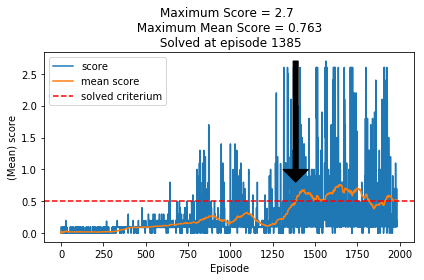

In [14]:

with active_session():

    scores_deque = deque(maxlen=100)                               # initialize deque to measure mean score 100 subsequent episodes
    all_scores = []                                                # initialize score list for scores of each episode
    all_mean_scores = []                                           # initialize score list for rolling mean over 100 episodes
    t=0                                                            # initialize timestep counter over all episodes
    noise=1                                                        # initial noise size
    score_max = 0                                                  # initial maximum score
    e_solved = n_episodes                                          # initial best guess of when the environment is solved

    for episode in keep_awake(range(n_episodes)):



        scores = np.zeros(num_agents)                              # initialize reward for this episode
        env_info = env.reset(train_mode=True)[brain_name]          # reset the environment    
        states = env_info.vector_observations                      # get the current state (for each agent)

        maddpg.reset()


        for _ in range(t_max):

            t += 1                                                 # timestep counter

            if episode < n_random_episodes:
                actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
                actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            else:
                # get best action from NN
                actions = maddpg.act(states, add_noise=add_noise, noise_decay=noise)


            # step the environment using the best actions
            env_info = env.step(actions)[brain_name]               # send all actions to tne environment
            next_states = env_info.vector_observations             # get next state (for each agent)
            rewards = env_info.rewards                             # get reward (for each agent)
            dones = env_info.local_done                            # see if episode finished

            # update scores
            scores += rewards

            # add experience to memory
            maddpg.memory.add(states, actions, rewards, next_states, dones)

            # learn 
            maddpg.update(t)

            # end episode if one of the agents is done
            if np.any(dones):
                break

            # roll over to the next state
            states = next_states


        # keep track of scores
        scores_deque.append(max(scores))
        all_scores.append(max(scores))
        all_mean_scores.append(np.mean(scores_deque))

        # update noise size
        noise = noise * noise_decay

        # save good model
        if np.mean(scores_deque) > 0.5 and np.mean(scores_deque) > score_max:
            print('  --->   Saving checkpoints!')
            maddpg.checkpoint(version)
            score_max = np.mean(scores_deque)
            e_solved = min(e_solved, episode)

        # stop learning when score keeps to be zero or returns to zero
        if episode > 2000 and np.mean(scores_deque)==0:
            print('Abort: agent does not learn (or reached critical forgetting)')
            break

        # continue learning after environment is solved for 1000 more episodes to evaluate stability of agent
        if episode >= e_solved + n_extra_episodes:
            break

        print('{0:s} \t - \t Episode: {1:d} \t - \t Score: {2:.3f} \t - \t Mean score: {3:.3f}'.format(datetime.datetime.now().strftime("%H:%M:%S"), episode, max(scores), np.mean(scores_deque)))

    if score_max >= 0.5:
        
        print('\nEnvironment solved in %d episodes. Maximum score is %.3f \n'%(e_solved, score_max))
        
        save_scores(all_scores, all_mean_scores, e_solved, version=version)
        
        plot_scores(all_scores, all_mean_scores, e_solved, version='.')
        

## 4. Test the agent

In [2]:
from unityagents import UnityEnvironment
import torch
from agents import MADDPG
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
## Note: only run this cell if the environment is not loaded yet!

# load the Tennis app
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

# get Tennis app info
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]          # reset the environment 
states = env_info.vector_observations
state_size = states.shape[1]                               # get state size
action_size = brain.vector_action_space_size               # get action size
q_input_size = int(2 * (state_size + action_size))         # get critic input size
num_agents = len(env_info.agents)                          # get number of agents

# instantiate the MADDPG agent
agent = MADDPG(state_size, action_size, q_input_size, 1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
# load network weights to MADDPG agent
for i, ddpg_agent in enumerate(agent.maddpg_agent):
    ddpg_agent.actor_local.load_state_dict(torch.load('results/checkpoint_actor_agent%d.pth'%i))
    ddpg_agent.critic_local.load_state_dict(torch.load('results/checkpoint_critic_agent%d.pth'%i))

Total score this episode: 1.4000000208616257
Total score this episode: 0.7000000104308128
Total score this episode: 0.10000000149011612
Total score this episode: 0.4000000059604645
Total score this episode: 1.8000000268220901
Total score this episode: 0.5000000074505806
Total score this episode: 0.5000000074505806
Total score this episode: 0.20000000298023224
Total score this episode: 0.10000000149011612
Total score this episode: 1.0000000149011612


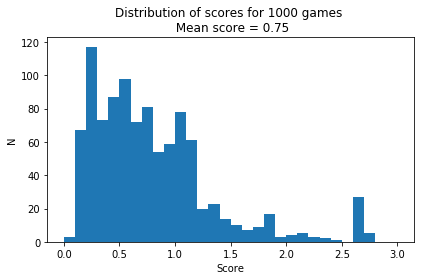

In [5]:

n = 1000
all_scores = []
for i in range(n):                                         # play game for n episodes
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states, add_noise=False)       # get next action from the maddpg agent
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        states = env_info.vector_observations              # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        if np.any(dones):                                  # exit loop if episode finished
            break
    if i < 10:
        print('Total score this episode: {}'.format(np.max(scores)))
    all_scores.append(np.max(scores))
    
plt.hist(all_scores, bins=np.linspace(0,3,31))
plt.xlabel('Score')
plt.ylabel('N')
plt.title('Distribution of scores for %d games \n Mean score = %.2f'%(n, np.mean(all_scores)))
plt.tight_layout()
plt.savefig('results/score_distribution.png')
plt.savefig('results/score_distribution.pdf')


## 5. Close the environment

In [ ]:
env.close()